# Calculating the odds for dice rolls
This notebook I deal with the odds for dice rolls known from many board games.

## Supporting functions
For further analysis the following functions will be used several times.

### Define the dice
The most common type of dice in game is the one with 6 numbers on it.

In Python syntax, you simply can use a range() to get a list of all the possible outcomes for a dice roll.

In [222]:
d6 = range(1, 7)

for x in d6: print(x)

1
2
3
4
5
6


### Drawing a diagram
matplotlib helps with drawing a diagram for given values.

In [223]:
import matplotlib.pyplot as plt
import pprint as pp

def plot(data, title):
  plt.title(title)
  plt.xlabel("Roll")
  plt.ylabel("Occurence")
  plt.bar(data.keys(), data.values())
  plt.show()

  pp.pprint(data)

### Cartesian product

For determining all possible combinations for a roll, we need the cartesian product.

In [224]:
def cartesian(dice, numberDices = 1, acc_func = lambda x, y: x + y):
  """
  Two lists to combine with each other.
  Parameters:
    first (list of ints): first list
    second (list of ints): second list
  Returns:
    acc_func (function): function taking two parameters for accumulating
                         the elements both lists into one
  """
  if(numberDices < 1):
      return []
  
  if(numberDices == 1):
    return dice

  accumulated = []
  for x in cartesian(dice, numberDices - 1, acc_func):
    for y in dice:
      accumulated.append(acc_func(x, y))

  return accumulated

This could be some example of using the function:

In [225]:
print(cartesian(list(d6)))
print(cartesian([1,2,3], 2))

[1, 2, 3, 4, 5, 6]
[2, 3, 4, 3, 4, 5, 4, 5, 6]


In addition, in case of an neccessary alternate way of accumulating numbers, we could for example want to multiply the numbers instead of getting the sum.

In [226]:
print(cartesian(d6, 2, lambda x, y: x * y))

[1, 2, 3, 4, 5, 6, 2, 4, 6, 8, 10, 12, 3, 6, 9, 12, 15, 18, 4, 8, 12, 16, 20, 24, 5, 10, 15, 20, 25, 30, 6, 12, 18, 24, 30, 36]


### Group different results
In addition to determining all the different results, now we need to count the amount of every distinct outcome.

In [227]:
def groupNumbers(unorderedList):
  """
  Parameters:
    unorderedList (list of ints): unordered list of all individual outcomes
  Resturns:
    a dictionary with distinct outcomes and their number of occurences in the original list
  """
  dictionary = {}
  for x in unorderedList:
    if(x in dictionary.keys()):
      dictionary[x] = dictionary[x] + 1
    else:
      dictionary[x] = 1

  return dictionary

An examplary result could look like this:

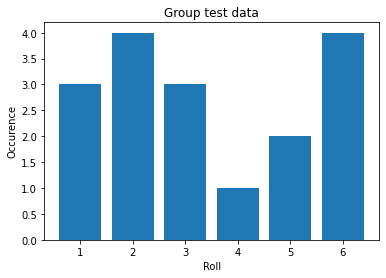

{1: 3, 2: 4, 3: 3, 4: 1, 5: 2, 6: 4}


In [228]:
testData = [6,1,2,3,2,4,5,2,3,1,5,6,1,6,2,6,3]
plot(groupNumbers(testData), "Group test data")

### Odds
Based on the amount of every distinct single result, we now can calculate the probability of every distinct result of a dice roll.

In [229]:
def odds(grouped):
  """
  Parameters:
    grouped (dictionary of ints): dictionary of possible outcomes with their number of occurence
  Resturns:
    a dictionary with distinct outcomes and their probability of occurence based on the original list
  """
  total = sum(grouped.values())

  result = {}
  for k in grouped.keys():
    result[k] = grouped[k] / total

  return result

### Advantage
iN some sort of game, e.g. in **Dungeons & Dragons**, there is the concept of an advantage roll. That means, you do roll twice and the ***better*** result counts!

In [230]:
def advantage(dice, number):
  return cartesian(cartesian(dice, number), 2, max)

### Putting steps together
Now, for reasons of simplicity in further usage of all the previous functions shown, let's combine their call into one single function.

In [231]:
def calc(dice, number = 1, func = lambda x, n: cartesian(x, n)):
  unordered = func(dice, number)
  grouped = groupNumbers(unordered)
  return odds(grouped)

Based on the first example, these are the odds for all the distinct results:

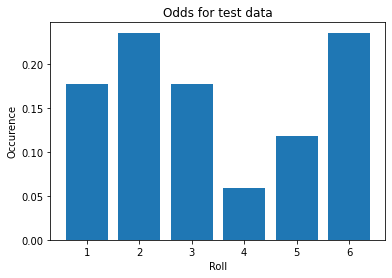

{1: 0.17647058823529413,
 2: 0.23529411764705882,
 3: 0.17647058823529413,
 4: 0.058823529411764705,
 5: 0.11764705882352941,
 6: 0.23529411764705882}


In [232]:
plot(calc(testData), "Odds for test data")

## Scenarios
Now, let's look at different scenarios of rolling dice!

### Normal


#### 1 dice

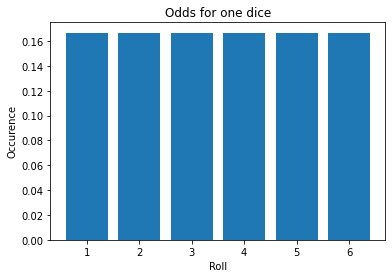

{1: 0.16666666666666666,
 2: 0.16666666666666666,
 3: 0.16666666666666666,
 4: 0.16666666666666666,
 5: 0.16666666666666666,
 6: 0.16666666666666666}


In [233]:
plot(calc(d6), "Odds for one dice")

#### 2 dices

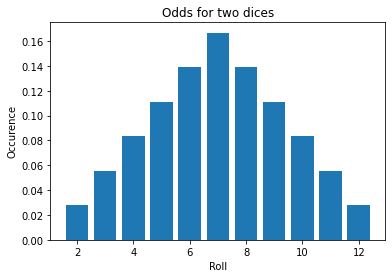

{2: 0.027777777777777776,
 3: 0.05555555555555555,
 4: 0.08333333333333333,
 5: 0.1111111111111111,
 6: 0.1388888888888889,
 7: 0.16666666666666666,
 8: 0.1388888888888889,
 9: 0.1111111111111111,
 10: 0.08333333333333333,
 11: 0.05555555555555555,
 12: 0.027777777777777776}


In [234]:
plot(calc(d6, 2), "Odds for two dices")

#### 4 dices

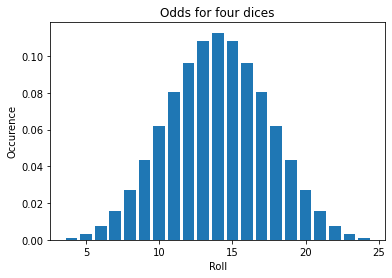

{4: 0.0007716049382716049,
 5: 0.0030864197530864196,
 6: 0.007716049382716049,
 7: 0.015432098765432098,
 8: 0.02700617283950617,
 9: 0.043209876543209874,
 10: 0.06172839506172839,
 11: 0.08024691358024691,
 12: 0.09645061728395062,
 13: 0.10802469135802469,
 14: 0.11265432098765432,
 15: 0.10802469135802469,
 16: 0.09645061728395062,
 17: 0.08024691358024691,
 18: 0.06172839506172839,
 19: 0.043209876543209874,
 20: 0.02700617283950617,
 21: 0.015432098765432098,
 22: 0.007716049382716049,
 23: 0.0030864197530864196,
 24: 0.0007716049382716049}


In [235]:
plot(calc(d6, 4), "Odds for four dices")

### With advantage

#### 1 dice

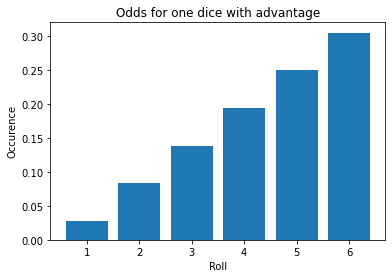

{1: 0.027777777777777776,
 2: 0.08333333333333333,
 3: 0.1388888888888889,
 4: 0.19444444444444445,
 5: 0.25,
 6: 0.3055555555555556}


In [236]:
plot(calc(d6, 1, advantage), "Odds for one dice with advantage")

#### 2 dices

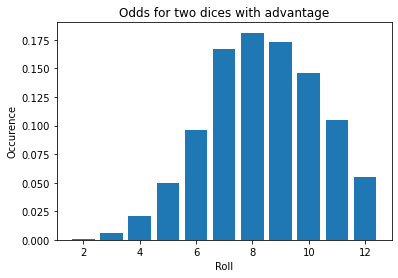

{2: 0.0007716049382716049,
 3: 0.006172839506172839,
 4: 0.020833333333333332,
 5: 0.04938271604938271,
 6: 0.09645061728395062,
 7: 0.16666666666666666,
 8: 0.18132716049382716,
 9: 0.1728395061728395,
 10: 0.14583333333333334,
 11: 0.10493827160493827,
 12: 0.05478395061728395}


In [237]:
plot(calc(d6, 2, advantage), "Odds for two dices with advantage")

#### 4 dices

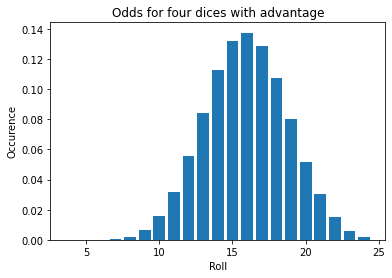

{4: 5.953741807651273e-07,
 5: 1.4288980338363054e-05,
 6: 0.00011907483615302546,
 7: 0.0005953741807651272,
 8: 0.002188000114311843,
 9: 0.0065348270080780365,
 10: 0.01581313824112178,
 11: 0.03195016003657979,
 12: 0.05544422058375248,
 13: 0.08418590916018899,
 14: 0.11265432098765432,
 15: 0.1318634735558604,
 16: 0.13745701398414875,
 17: 0.12854366712391405,
 18: 0.107643651882335,
 19: 0.07988492607834172,
 20: 0.0518243455647005,
 21: 0.03026882335009907,
 22: 0.015313023929279074,
 23: 0.006158550525834476,
 24: 0.0015426145023624447}


In [238]:
plot(calc(d6, 4, advantage), "Odds for four dices with advantage")